# Iris Dataset 

#### Data Collection

In [1]:
import pandas as pd
url='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
colnames=['SL','SW','PL','PW','Class']
data=pd.read_csv(url,names=colnames)

#### Data interpretation

In [2]:
data.info()
type(data)
data.head(20)
data.tail(10)
data.describe()

data['Class'].unique()

classes={'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2}
data.replace({'Class':classes},inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SL      150 non-null    float64
 1   SW      150 non-null    float64
 2   PL      150 non-null    float64
 3   PW      150 non-null    float64
 4   Class   150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Array creation

In [3]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values

#### Split the universal dataset

In [4]:
#Library: sklearn
#Module : model_selection
#Class  : train_test_split

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test=tts(x,y)

#### Algorithm selection

In [5]:
#LOGISTIC REGRESSION
#Library: sklearn
#Module : linear_model
#Class  : LogisticRegression
from sklearn.linear_model import LogisticRegression as logreg
model_logreg=logreg()

#### Train the model with training set of data

In [6]:
#Function: fit(arrays of x and y train)
model_logreg.fit(x_train,y_train)

C:\Users\SHRI\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

#### TEST THE MODEL

In [8]:
#1. Ask the model to predict answers for test data
#2. Check accuracy for test data

#PREDICT
#Function: predict()
y_pred=model_logreg.predict(x_test)

In [12]:
#ACCURACY
#Function: score()
logreg_acc=model_logreg.score(x_test, y_test)
print(logreg_acc)

0.9210526315789473


#### CONFUSION MATRIX

In [13]:
#Ratio of right and wrong predictions
#Library: sklearn
#Module : metrics
#Class  : confusion_matrix
from sklearn.metrics import confusion_matrix as cm
conmat=cm(y_test,y_pred)

#### Data Analysis(Visualization)

C:\Users\SHRI\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Class', ylabel='count'>

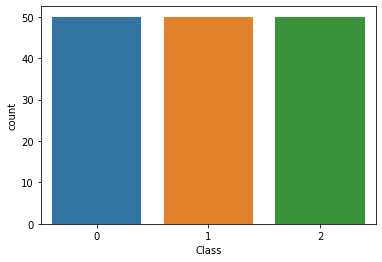

In [14]:
#EXPLORATORY DATA ANALYSIS

import seaborn as sb
sb.countplot(data['Class'])

#### PAIRPLOT

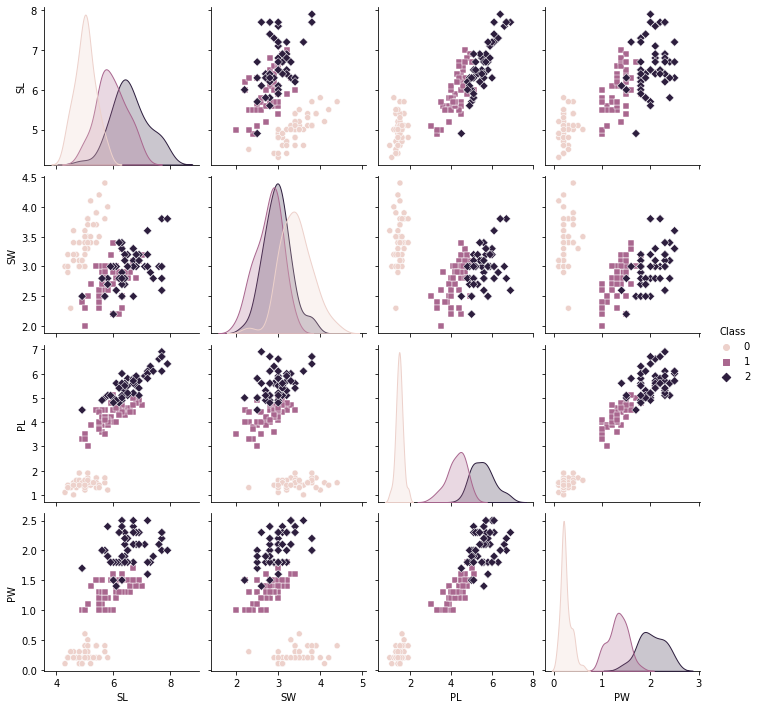

In [15]:
#import matplotlib.pyplot as plt
#from matplotlib import pyplot as plt
sb.pairplot(data,hue='Class',markers=['o','s','D'])
#plt.show()

#### SCATTER MATRIX

array([[<AxesSubplot:xlabel='SL', ylabel='SL'>,
        <AxesSubplot:xlabel='SW', ylabel='SL'>,
        <AxesSubplot:xlabel='PL', ylabel='SL'>,
        <AxesSubplot:xlabel='PW', ylabel='SL'>,
        <AxesSubplot:xlabel='Class', ylabel='SL'>],
       [<AxesSubplot:xlabel='SL', ylabel='SW'>,
        <AxesSubplot:xlabel='SW', ylabel='SW'>,
        <AxesSubplot:xlabel='PL', ylabel='SW'>,
        <AxesSubplot:xlabel='PW', ylabel='SW'>,
        <AxesSubplot:xlabel='Class', ylabel='SW'>],
       [<AxesSubplot:xlabel='SL', ylabel='PL'>,
        <AxesSubplot:xlabel='SW', ylabel='PL'>,
        <AxesSubplot:xlabel='PL', ylabel='PL'>,
        <AxesSubplot:xlabel='PW', ylabel='PL'>,
        <AxesSubplot:xlabel='Class', ylabel='PL'>],
       [<AxesSubplot:xlabel='SL', ylabel='PW'>,
        <AxesSubplot:xlabel='SW', ylabel='PW'>,
        <AxesSubplot:xlabel='PL', ylabel='PW'>,
        <AxesSubplot:xlabel='PW', ylabel='PW'>,
        <AxesSubplot:xlabel='Class', ylabel='PW'>],
       [<AxesSubplot:xla

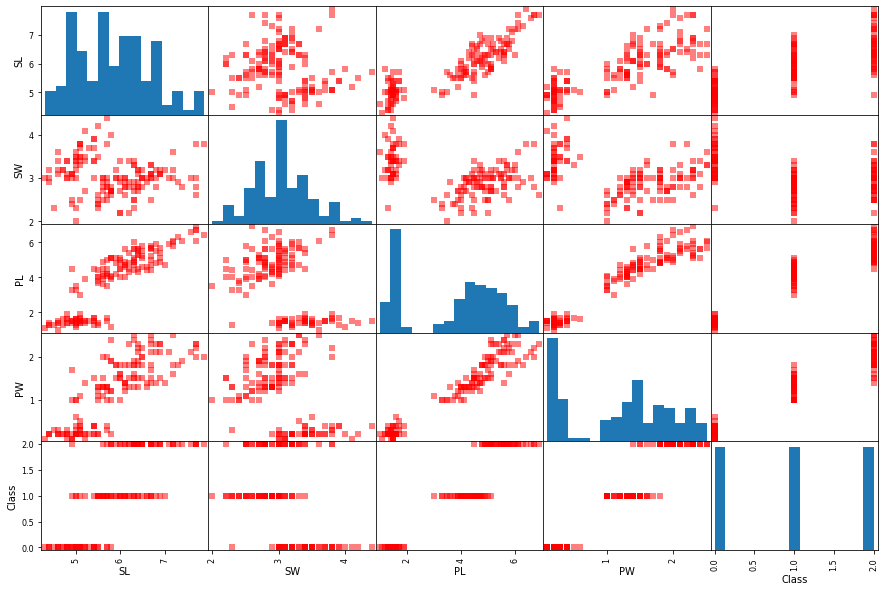

In [16]:
#SCATTER MATRIX
#Library: pandas
#Module : plotting
#Class  : scatter_matrix
from pandas.plotting import scatter_matrix as sm
sm(data,c='r',figsize=(15,10),marker='s',hist_kwds={'bins':15})

#### SCATTER PLOT

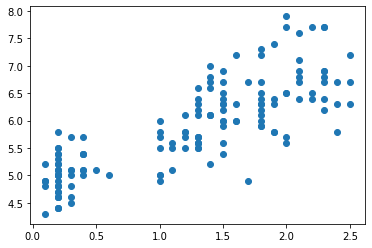

In [19]:
import matplotlib.pyplot as plt
from matplotlib import cm
cmap=cm.get_cmap('gnuplot')
plt.scatter(data['PW'],data['SL'],cmap=cmap)